**My name is Ganesh Raj V .** Thank you for giving me this wonderful opportunity. 

**1.** Here I have implemented the video you provided 

**2.** In the next part I have used pre-trained model   **"Haar cascade-Classifier"** to make the classifier recognize

In [1]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=328f5b9255ebd8dca3b6f6e571b75644ad9402e1149746f88ee8482101443fb5
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
import matplotlib.pyplot as plt 
from skimage.feature import hog 
from skimage import data,exposure
import cv2

In [3]:
img=cv2.imread('/content/MYPROFESSIONALPIC.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

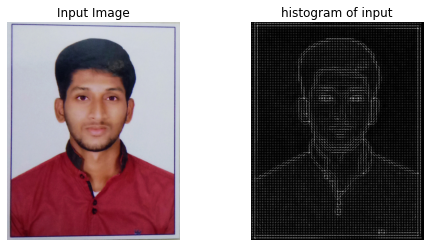

In [4]:
fd,hog_img=hog(img,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)

ax1.axis('off')
ax1.imshow(img,cmap=plt.cm.gray)
ax1.set_title('Input Image')

hog_image_rescaled=exposure.rescale_intensity(hog_img,in_range=(0,3))

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('histogram of input')
plt.show()

In [5]:
print("size of output image",fd.shape)  # 1d as vector as image is represented as Gray scale 
print("Size of input image",img.shape)  # RGB is represented as 3d matrix hence 3 colour channels

size of output image (44352,)
Size of input image (1349, 1070, 3)


**Make sure the runtime is GPU**

In [1]:
import face_recognition
from matplotlib.patches import Rectangle,Circle
import numpy as np



In [19]:
from google.colab.patches import cv2_imshow

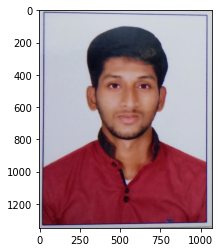

In [8]:
img=cv2.imread('/content/MYPROFESSIONALPIC.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [9]:
face_location=face_recognition.face_locations(img) # returns the face box coordinates with height and width ( 4 values ) 
print("No of face",len(face_location))

No of face 1


link to the image
https://images.app.goo.gl/PkUAGF2i6fEfa25d9

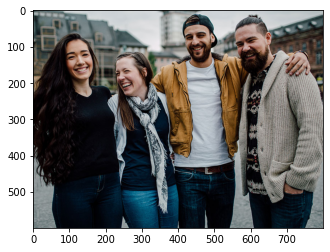

In [10]:

img_1=cv2.imread('/content/detect.jpg')
img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [11]:
face_location_1=face_recognition.face_locations(img_1) # returns the face box coordinates 
print("No of face",len(face_location_1))

No of face 4


Face is located at top:212 ,Left:146 ,Bottom:287 ,Right:221 
Face is located at top:86 ,Left:96 ,Bottom:175 ,Right:186 
Face is located at top:411 ,Left:47 ,Bottom:486 ,Right:121 
Face is located at top:533 ,Left:44 ,Bottom:641 ,Right:152 


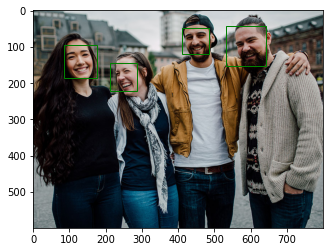

In [12]:
plt.imshow(img_1)
ax=plt.gca()

for face_location in face_location_1:

  top,right,bottom,left=face_location
  x,y,w,h=left,top,right,bottom
  print("Face is located at top:{} ,Left:{} ,Bottom:{} ,Right:{} ".format(x,y,w,h))

  rect=Rectangle((x,y),w-x,h-y,fill=False,color='green')  # fill True will fill the bounded box with specified colour
  ax.add_patch(rect)
plt.show()

**Database of Images**

link to image_2:
https://images.app.goo.gl/Av5FWPRU7of8CBec9

link to image 3:
https://images.app.goo.gl/miFiXR9JXQX3y1rBA

In [6]:
img=cv2.imread('/content/MYPROFESSIONALPIC.jpg')  # My image ( Ganesh Raj)
ganesh=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


img=cv2.imread('/content/sundar.jpg')             # sundar
sundar=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img=cv2.imread('/content/satya_nadella.jpg')      # satya_nadella
satya=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


# Encoding the Database

In [7]:
ganesh_encoding=face_recognition.face_encodings(ganesh)[0]
sundar_encoding=face_recognition.face_encodings(sundar)[0]
satya_encoding=face_recognition.face_encodings(satya)[0]


In [8]:
known_face=[ganesh_encoding,sundar_encoding,satya_encoding]      # Database of Verified Faces

**Test Images**

link to test images:

https://drive.google.com/drive/folders/17IrIECcv-7imEYcJTGNz8UifdJSIaL5p?usp=sharing

In [24]:
test_img1=cv2.imread('/content/ganesh1.jpg')
known=cv2.cvtColor(test_img1,cv2.COLOR_BGR2RGB)               # Test image 1 ( Ganesh Raj)

test_img2=cv2.imread('/content/other.jpg')
unknown=cv2.cvtColor(test_img2,cv2.COLOR_BGR2RGB)             # Test image 2  ( Unknown ) 

# Changing to 1d vector
known_encoding=face_recognition.face_encodings(known)[0]    
unknown_encoding=face_recognition.face_encodings(unknown)[0]

test_face=[unknown_encoding,known_encoding]                   # Images to be recognized 


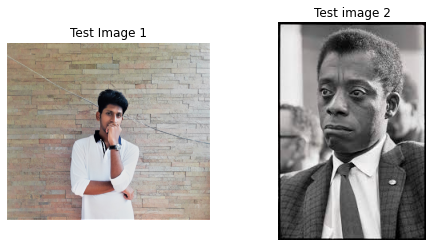

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4))

ax1.axis('off')
ax1.imshow(known)
ax1.set_title('Test Image 1')



ax2.axis('off')
ax2.imshow(test_img2)
ax2.set_title('Test image 2')
plt.show()

**Face Recognition**

--------Please Add to Database-----------------------
Unknown
-------------------------------------------------------
It's Ganesh 


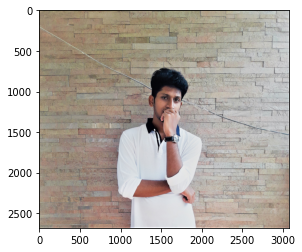

In [27]:
from scipy.spatial import distance

for test in test_face:                        # looping over images to be recognized 
  result=[]

  for known_Face in known_face:               # looping over Database to cross-verify 
    d=distance.euclidean(known_Face,test)
    result.append(d)
  threshold = 0.6
  result = np.array(result) <= threshold          # returns bool value ( True / False )

  #print('Result  :',result)

  person="Unknown"

  if result[0]:
    person="It's Ganesh "
    img_1=cv2.imread('/content/ganesh1.jpg')
    img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
    plt.imshow(img_1)
    print("-------------------------------------------------------")
  elif result[1]:
    person="It's Sundar_Pichai"
    img_1=cv2.imread('/content/sundar.jpg')
    img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
    plt.imshow(img_1)
    print("-------------------------------------------------------")
  elif result[2]:
    person="It's Satya_Nadella"
    img_1=cv2.imread('/content/satya_nadella.jpg')
    img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
    plt.imshow(img_1)
    print("-------------------------------------------------------")
  elif person=='Unknown':
    print("--------Please Add to Database-----------------------")

  print(person)
  



Part-02

**Using Pre-Trained Model Haar-cascade classifier**

**FACE GENERATOR / CREATING DATABASE**

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 10 23:26:27 2020

@author: ganesh
"""


import cv2
import os
import numpy as np
from PIL import Image


cam = cv2.VideoCapture(-1)   # set to 0 if error occured 
cam.set(3, 640) # set video width
cam.set(4, 480) # set video height

# Provide Correct Path 
face_detector = cv2.CascadeClassifier('/home/ganesh/Documents/intern/haarcascade_frontalface_default.xml')

# For each person, enter one numeric face id
face_id = input('\n Enter Face_ID')

print("\n [INFO] Initializing face capture. Look the camera and wait ...")
# Initialize individual sampling face count
count =0

while(True):                    # For video capturing
    r, img = cam.read()       # Reading Frames from Camera 

    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)
    
    # Creating Rectangle Box over the face
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1

        # Save the captured image into the given folder
        cv2.imwrite("/home/ganesh/Documents/intern/data/" + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])

        cv2.imshow('Image', img)

    k = cv2.waitKey(100) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
    elif count >= 1000: # Take 1000 face sample and stop video
         break


print("\n Dataset Created")
cam.release()
cv2.destroyAllWindows()

**TRAINING PART**

In [ ]:
# PATH FOR ABOVE DATASET
path = '/home/ganesh/Documents/intern/data'

recognizer = cv2.face.LBPHFaceRecognizer_create()   # CREATING LOCAL BINARY PATTERNS (HISTOGRAMS)
detector = cv2.CascadeClassifier("/home/ganesh/Documents/intern/haarcascade_frontalface_default.xml");  # FACE DETECTION CLASSIFIER 

# ASSIGNING LABEL TO REGISTERED FACES
def getImagesAndLabels(path):
    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]     # CREATING PATH FOR EACH IMAGE
    face=[]
    ids = []
    count=0
    for imagePath in imagePaths:
        PIL_img = Image.open(imagePath).convert('L') # CONVERT TO GRAY SCALE 
        img_numpy = np.array(PIL_img,'uint8')        # IMAGE AS NUMPY ARRAY FORMAT 
        
        faces = detector.detectMultiScale(img_numpy)
        count=count+1
        if count<=1000:
            for (x,y,w,h) in faces:
                face.append(img_numpy[y:y+h,x:x+w])
                ids.append(1)
        else:
            
            for (x,y,w,h) in faces:
                face.append(img_numpy[y:y+h,x:x+w])
                ids.append(2)
    return face,ids                         # LIST OF FACE AND ID 

# TRAINING FACE 
faces,ids = getImagesAndLabels(path)        # CALLING THE METHOD TO CREATE LABELS
recognizer.train(faces, np.array(ids))      # PROVIDING ABOVE CREATED CREATED IMAGE WITH CORRESPONDING LABEL 


recognizer.write('/home/ganesh/Documents/intern/model/model.yml')    # SAVING THE TRAINED MODEL TO YML FILE 

print("\n {0} faces trained.".format(len(np.unique(ids))))

**Face-Recognition**

In [ ]:

recognizer = cv2.face.LBPHFaceRecognizer_create()  
recognizer.read('/home/ganesh/Documents/intern/model/model.yml')
cascadePath = "/home/ganesh/Documents/intern/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX # font for text 


Known = ['dummy','Ganesh']

# Initialize and start realtime video capture
cam = cv2.VideoCapture(0)        # Try change the value to -1 if ( error occurs)
cam.set(3, 640) # set video widht
cam.set(4, 480) # set video height

# Setting the min window size to be recognized as face
minW = 0.1*cam.get(3)
minH = 0.1*cam.get(4)

while True:
    r, img =cam.read()
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale( 
        gray,
        scaleFactor = 1.2,
        minNeighbors = 5,
        minSize = (int(minW), int(minH)),
       )

    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        id, confidence = recognizer.predict(gray[y:y+h,x:x+w])

        # Check if confidence is less than 100 
        if (confidence < 100):
            id = Known[id]
            confidence = "  {0}%".format(round(100 - confidence))
        else:
            id = "UNKNOWN"
            confidence = "  {0}%".format(round(100 - confidence))
        
        cv2.putText(img, str(id), (x+5,y-5), font, 1, (255,255,255), 2)
        cv2.putText(img, str(confidence), (x+5,y+h-5), font, 1, (255,255,0), 1)  
    
    cv2.imshow('Recognizer',img) 

    k = cv2.waitKey(10) & 0xff # Press 'ESC' to stop 
    if k == 27:
        break


print("\n Thank you , Program has Ended")
cam.release()
cv2.destroyAllWindows()



**I have recently done Face Mask Prediction Using Yolo_V3 algorithm**

Here is the link to my Face Mask Detection:

https://github.com/Ganesh9100/Mask-Detection-YOLO_V3-


**Thank you one again. Awaiting to work and learn with Nuclei Technologies**